In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

# Reading The Dataset

In [2]:
df_Hawaii=pd.read_csv('D:\\ML BG\\Project\\Final\\listings.csv',encoding="latin1")

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_Hawaii.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5065,https://www.airbnb.com/rooms/5065,2.020000e+13,12/4/2019,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Mauka B & B is 400 square feet studio with a p...,"Perfect for your vacation, Staycation or just ...",none,Neighbors here are friendly but are not really...,...,f,f,moderate,f,f,2,2,0,0,0.45
1,5269,https://www.airbnb.com/rooms/5269,2.020000e+13,12/5/2019,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The âAuwai Suite is a lovely, self-contained...","The 'Auwai Suite is a lovely, self-contained a...",none,"We are located on the ""sunny side"" of Waimea, ...",...,t,f,strict_14_with_grace_period,f,f,5,4,1,0,0.09
2,5387,https://www.airbnb.com/rooms/5387,2.020000e+13,12/4/2019,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,"Hale Koa Duplex: This duplex has a wonderful, ...",This Wonderful Spacious Studio apt/flat is in ...,none,IN a Farm belt area with small commercial farm...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.36
3,5389,https://www.airbnb.com/rooms/5389,2.020000e+13,12/5/2019,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,"Location: Keauhou, Kona Coast, Big Island, Haw...",It is less than 10 minute walk to the Keauhou ...,none,It is less than 10 minute walk to the Keauhou ...,...,f,f,flexible,f,f,3,3,0,0,0.23
4,5390,https://www.airbnb.com/rooms/5390,2.020000e+13,12/5/2019,STAY AT PRINCE KUHIO!,NaN,"Prince Kuhio, Studio Unit. Sleeps 2 privately....","Prince Kuhio, Studio Unit. Sleeps 2 privately....",none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.01


In [4]:
df_Hawaii.shape

(23745, 106)

In [5]:
df_Hawaii.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

# Check for null Values

In [6]:
df_Hawaii.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               16
summary                                           668
space                                            3706
description                                       186
experiences_offered                                 0
neighborhood_overview                            9748
notes                                            9641
transit                                         10897
access                                          10706
interaction                                      9916
house_rules                                      7031
thumbnail_url                                   23745
medium_url                                      23745
picture_url                                         0
xl_picture_url              

# Remove columns that has more than 70% null values

In [7]:
df_new=df_Hawaii.dropna(thresh=df_Hawaii.shape[0]*0.7,how='all',axis=1)
df_new.shape
#9 columns got removed

(23745, 92)

# Split the dataset to categorical and numerical

In [8]:
df_num=df_new.select_dtypes(include=['int64','float64'])
df_cat=df_new.select_dtypes(include=['object'])
df_num.shape,df_cat.shape

((23745, 42), (23745, 50))

# Handling Numeric data 

In [9]:
df_num.isnull().sum()

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                              276
host_total_listings_count                        276
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                         11
bedrooms                                          19
beds                                              44
price                                              0
security_deposit                                3746
cleaning_fee                                    1761
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                        

# Visualize numeric data 

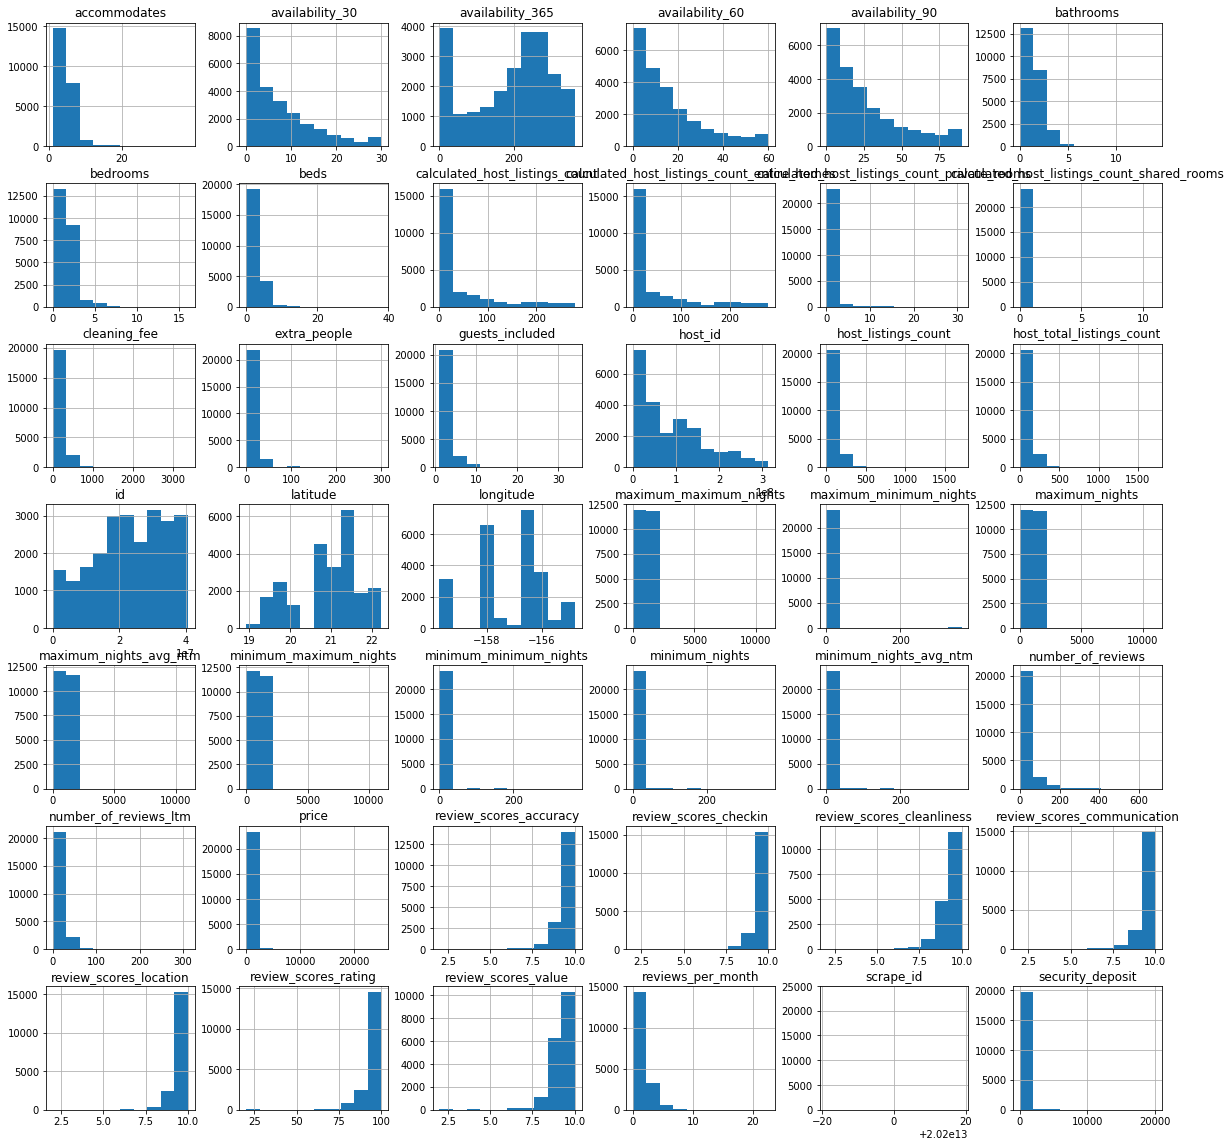

In [11]:
df_num.hist(figsize=(20,20))
plt.show()

In [ ]:
#We observe that most of the variables are ordinal and discrete and target variable,Price is skewed.
#Security_deposit,Cleaning fee are continuous

In [12]:
df_num_new=df_num.fillna({'host_listings_count':df_num['host_listings_count'].mode()[0],
                          'bathrooms':df_num['bathrooms'].mode()[0],
                          'bedrooms':df_num['bedrooms'].mode()[0],
                          'beds':df_num['beds'].mode()[0],
                          'review_scores_rating':96,
                          'review_scores_accuracy':df_num['review_scores_accuracy'].mode()[0],
                          'review_scores_cleanliness':df_num['review_scores_cleanliness'].mode()[0],
                           'review_scores_checkin':df_num['review_scores_checkin'].mode()[0],
                           'review_scores_communication':df_num['review_scores_communication'].mode()[0],
                          'review_scores_location':df_num['review_scores_location'].mode()[0],
                          'reviews_per_month':df_num['reviews_per_month'].mean(),
                          'review_scores_value':df_num['review_scores_value'].mode()[0],
                          'security_deposit':df_num['security_deposit'].mean(),
                          'cleaning_fee':df_num['cleaning_fee'].mean()})

# Does availabity affects price?

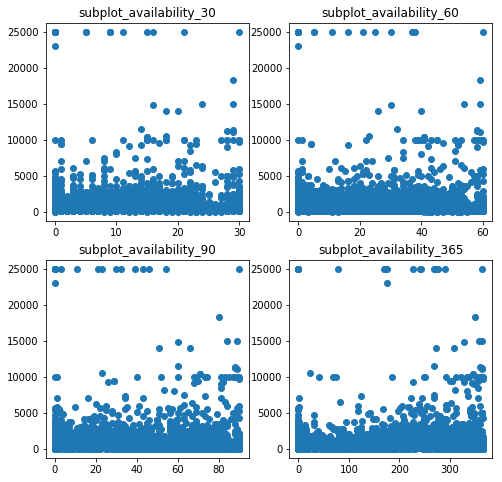

In [13]:
#Check relationship between all availability variables and price.(scatter plot)
from pylab import *
x=df_num["availability_30"]
x1=df_num["availability_60"]
x2=df_num["availability_90"]
x3=df_num["availability_365"]
y= df_num["price"]
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
title('subplot_availability_30')
plt.scatter(x, y)

plt.subplot(2, 2, 2)
title('subplot_availability_60')
# plt.figure(figsize=(6, 8))
plt.scatter(x1, y)

plt.subplot(2, 2, 3)
# plt.figure(figsize=(6, 8))
title('subplot_availability_90')
plt.scatter(x2, y)

plt.subplot(2, 2, 4)
# plt.figure(figsize=(6, 8))
title('subplot_availability_365')
plt.scatter(x3, y)

plt.show()

# Does number of nights spent affect price?

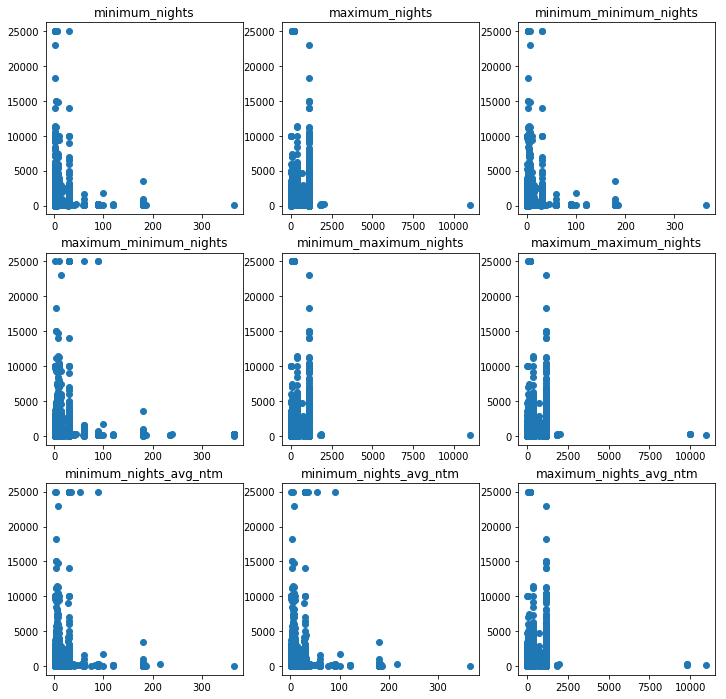

In [14]:
from pylab import *
x=df_num["minimum_nights"]
x1=df_num["maximum_nights"]
x2=df_num["minimum_minimum_nights"]
x3=df_num["maximum_minimum_nights"]
x4=df_num["minimum_maximum_nights"]
x5=df_num["maximum_maximum_nights"]
x6=df_num["minimum_nights_avg_ntm"]
x7=df_num["minimum_nights_avg_ntm"]
x8=df_num["maximum_nights_avg_ntm"]
y= df_num["price"]
plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
title('minimum_nights')
plt.scatter(x, y)

plt.subplot(3, 3, 2)
title('maximum_nights')
# plt.figure(figsize=(6, 8))
plt.scatter(x1, y)

plt.subplot(3, 3, 3)
# plt.figure(figsize=(6, 8))
title('minimum_minimum_nights')
plt.scatter(x2, y)

plt.subplot(3, 3, 4)
# plt.figure(figsize=(6, 8))
title('maximum_minimum_nights')
plt.scatter(x3, y)

plt.subplot(3, 3, 5)
# plt.figure(figsize=(6, 8))
title('minimum_maximum_nights')
plt.scatter(x4, y)

plt.subplot(3, 3, 6)
# plt.figure(figsize=(6, 8))
title('maximum_maximum_nights')
plt.scatter(x5, y)

plt.subplot(3, 3, 7)
# plt.figure(figsize=(6, 8))
title('minimum_nights_avg_ntm')
plt.scatter(x6, y)

plt.subplot(3, 3, 8)
# plt.figure(figsize=(6, 8))
title('minimum_nights_avg_ntm')
plt.scatter(x7, y)

plt.subplot(3, 3, 9)
# plt.figure(figsize=(6, 8))
title('maximum_nights_avg_ntm')
plt.scatter(x8, y)


plt.show()

# We remove unwanted numeric columns

In [15]:
#Normalize security_deposit,cleaning_fee,price
sd=np.log(1+df_num_new['security_deposit'])
cf=np.log(1+df_num_new['cleaning_fee'])
price=np.log(1+df_num_new['price'])

In [16]:
df=df_num_new.drop(['id', 'scrape_id', 'host_id','latitude',
       'longitude','minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365','security_deposit','cleaning_fee','price',
        'host_total_listings_count'],axis=1)

In [17]:
df_num_final=pd.concat([df,sd,cf,price],axis=1)
df_num_final.shape

(23745, 24)

# Categorical data

In [18]:
df_cat.shape,df_cat.isnull().sum()

((23745, 50), listing_url                            0
 last_scraped                           0
 name                                  16
 summary                              668
 space                               3706
 description                          186
 experiences_offered                    0
 house_rules                         7031
 picture_url                            0
 host_url                               0
 host_name                            276
 host_since                           276
 host_location                        304
 host_about                          6916
 host_response_time                  1476
 host_response_rate                  1476
 host_is_superhost                    276
 host_thumbnail_url                   276
 host_picture_url                     276
 host_neighbourhood                  4193
 host_verifications                     0
 host_has_profile_pic                 276
 host_identity_verified               276
 street              

# Types of categorical data

In [19]:
categorical=['host_location','host_response_time','host_neighbourhood','street','neighbourhood_group_cleansed',
             'state','market','country','property_type','room_type','bed_type','cancellation_policy']


boolean=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability',
         'requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification',
         'is_business_travel_ready']


date=['host_since','first_review','last_review']


textual=['listing_url', 'last_scraped', 'name', 'summary', 'space','description', 'experiences_offered', 
         'picture_url', 'host_url','host_name','host_thumbnail_url','host_picture_url','host_verifications','neighbourhood',
        'neighbourhood_cleansed','city','zipcode','smart_location','country_code','amenities','calendar_updated',
         'calendar_last_scraped','house_rules','host_location', 'host_about','host_response_rate']

In [20]:
df1=df_cat.drop(textual,axis=1)
df1.isnull().sum()

host_since                           276
host_response_time                  1476
host_is_superhost                    276
host_neighbourhood                  4193
host_has_profile_pic                 276
host_identity_verified               276
street                                 0
neighbourhood_group_cleansed           0
state                                 17
market                                15
country                                0
is_location_exact                      0
property_type                          0
room_type                              0
bed_type                               0
has_availability                       0
first_review                        5451
last_review                         5451
requires_license                       0
instant_bookable                       0
is_business_travel_ready               0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

In [21]:
len(df1['host_neighbourhood'].unique())

165

In [22]:
len(df1['street'].unique())

297

# Dropping Unwanted categorical Variables

In [23]:
dfc=df1.drop(['host_since','first_review','last_review','host_neighbourhood','street'],axis=1)
# df2=df2.drop(['host_response_rate'],axis=1)
dfc.isnull().sum()

host_response_time                  1476
host_is_superhost                    276
host_has_profile_pic                 276
host_identity_verified               276
neighbourhood_group_cleansed           0
state                                 17
market                                15
country                                0
is_location_exact                      0
property_type                          0
room_type                              0
bed_type                               0
has_availability                       0
requires_license                       0
instant_bookable                       0
is_business_travel_ready               0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

# Handling Missing Values

In [24]:
dfc['host_response_time'].value_counts()

within an hour        16446
within a few hours     4287
within a day           1305
a few days or more      231
Name: host_response_time, dtype: int64

In [25]:
dfc['state'].value_counts()

HI        23691
Hi           34
Hawaii        1
FL            1
US            1
Name: state, dtype: int64

In [26]:
dfc['market'].value_counts()

Maui                     7724
Oahu                     7215
The Big Island           5513
Kauai                    3143
Other (Domestic)           80
Big Island                 51
Other (International)       2
San Francisco               1
South Bay, CA               1
Name: market, dtype: int64

In [27]:
df3=dfc.fillna({'host_response_time':'within an hour','host_is_superhost':'f','host_has_profile_pic':'t',
               'host_identity_verified':'f','state':'HI','market':'maui'})

In [28]:
df3.isnull().sum().sum()

0

# Encoding variables

In [29]:
df_bool=df3.replace({'f':0,'t':1})
df_LE=df_bool.replace({'within an hour':4,'within a few hours':3,'within a day':2,'a few days or more':1})
df_cat_final=pd.get_dummies(data=df_LE,columns=['neighbourhood_group_cleansed', 'state','market','room_type','bed_type',
                                                'cancellation_policy','property_type'])
df_cat_final=df_cat_final.drop(['country'],axis=1)
df_cat_final.shape

(23745, 91)

# Creating Final dataframe

In [30]:
df=pd.concat([df_num_final,df_cat_final],axis=1)
df.shape

(23745, 115)

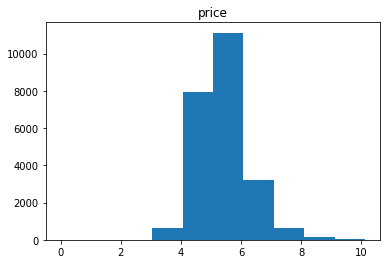

In [31]:
#Making Price variable normalized
plt.hist(df_num_final['price'])
plt.title('price')
plt.show()

In [32]:
x=df.drop(['price'],axis=1)
y=df['price']

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=LinearRegression().fit(x,y)
model.score(x,y)

0.628004123993267

In [34]:
train_MSE = np.mean((y - model.predict(x))**2)
test_MSE = np.mean((Y_test - model.predict(X_test))**2)
print(train_MSE)
print(test_MSE)

0.25703574315729316
0.2665348363513679


# With Feature Engineering to improve model accuracy

In [35]:
dff=pd.concat([x,y],axis=1)
dff.shape
x.shape

(23745, 114)

# Point Biserial

In [ ]:
##Identified variables that were ordinal and removed them

In [36]:
df_binary=dff.drop(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month','host_response_time','price'],axis=1)

In [37]:
from scipy.stats import pointbiserialr
from scipy import stats
pt_biserial=df_binary.apply(lambda x:stats.pointbiserialr(x, y))
df_p=pd.DataFrame(pt_biserial)
c1=df_p.reset_index()
c2=c1.rename(columns={'index':'col',0:'corr_coeff'})
c3=c2.loc[c2['corr_coeff'].apply(lambda x:x[0]>0)]
l=c3['col'].tolist()
l

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


['neighbourhood_group_cleansed_Kauai',
 'neighbourhood_group_cleansed_Maui',
 'state_FL',
 'state_HI',
 'state_US',
 'market_Big Island',
 'market_Kauai',
 'market_Maui',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'bed_type_Real Bed',
 'cancellation_policy_luxury_moderate',
 'cancellation_policy_luxury_no_refund',
 'cancellation_policy_luxury_super_strict_125',
 'cancellation_policy_luxury_super_strict_95',
 'cancellation_policy_super_strict_30',
 'cancellation_policy_super_strict_60',
 'property_type_Boutique hotel',
 'property_type_Condominium',
 'property_type_House',
 'property_type_Igloo',
 'property_type_Island',
 'property_type_Resort',
 'property_type_Serviced apartment',
 'property_type_Timeshare',
 'property_type_Townhouse',
 'property_type_Villa']

# Spearman correlation

In [ ]:
n=dff[['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds','guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'reviews_per_month',
       'host_response_time','price']]

In [ ]:
plt.figure(figsize=(12,10))
corr=n.corr(method='spearman')
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
cor_target = corr["price"]
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
d1=dff[['accommodates','bathrooms','bedrooms','price']] #combining highly related features with price
d2=dff[l]                #Point biserial variables that are related to price
d3=pd.concat([sd,cf],axis=1) #continuous variables
d4=pd.concat([d1,d2],axis=1)
x2=d4.drop(['price'],axis=1)
y2=d4['price']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x2,y2,test_size=0.2,random_state=10)
model2=LinearRegression().fit(x2,y2)
model2.score(x2,y2)

In [ ]:
train_MSE = np.mean((y2 - model2.predict(x2))**2)
test_MSE = np.mean((Y_test - model2.predict(X_test))**2)
print(train_MSE)
print(test_MSE)

# Random Forest

# To find top features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelr=RandomForestRegressor(random_state=1,max_depth=10)
modelr.fit(x,y)

In [ ]:
features=x.columns
importances=modelr.feature_importances_
indices=np.argsort(importances)[-20:]
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.show()

In [ ]:
l2=[features[i] for i in indices]
x3=x[l2]
y3=y

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x3,y3,test_size=0.2,random_state=10)
model3=LinearRegression().fit(x3,y3)
model3.score(x3,y3)

In [ ]:
train_MSE = np.mean((y3 - model3.predict(x3))**2)
test_MSE = np.mean((Y_test - model3.predict(X_test))**2)
print(train_MSE)
print(test_MSE)

# Analyzing top three features

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(dff['bathrooms'],dff['price'])
plt.title('Bathrooms')

plt.subplot(222)
plt.scatter(dff['cleaning_fee'],dff['price'])
plt.title('cleaning_fee')

plt.subplot(223)
plt.scatter(dff['calculated_host_listings_count_shared_rooms'],dff['price'])
plt.title('shared_rooms')

